# The effect of missing data

HELP FROM :
- How to generate bivariate distributions : https://www2.stat.duke.edu/courses/Spring12/sta104.1/Lectures/Lec22.pdf
- Use MCAR, MAR, etc : http://stronginference.com/missing-data-imputation.html

In [1]:
import numpy as np
from sklearn import linear_model
import random
import math
import copy # in order to copy an array or list without modifying it
import matplotlib.pyplot as plt
%matplotlib inline

.....................................................
       Linear regression with all observations       
.....................................................
The coefficient corresponding to X is -0.00735730853033
The intercept is 118.24457467

 

.............................................
       Missing Completely At Random (MCAR)       
.............................................
The coefficient corresponding to X is 0.310379850597
The intercept is 76.7208633533

 

..................................
       Missing At Random (MCAR)       
..................................
The coefficient corresponding to X is 0.0781331898824
The intercept is 109.2734793

 

.........................................
       Missing Not At Random (MNAR)       
.........................................
The coefficient corresponding to X is 0.0287033093469
The intercept is 108.323102768
 



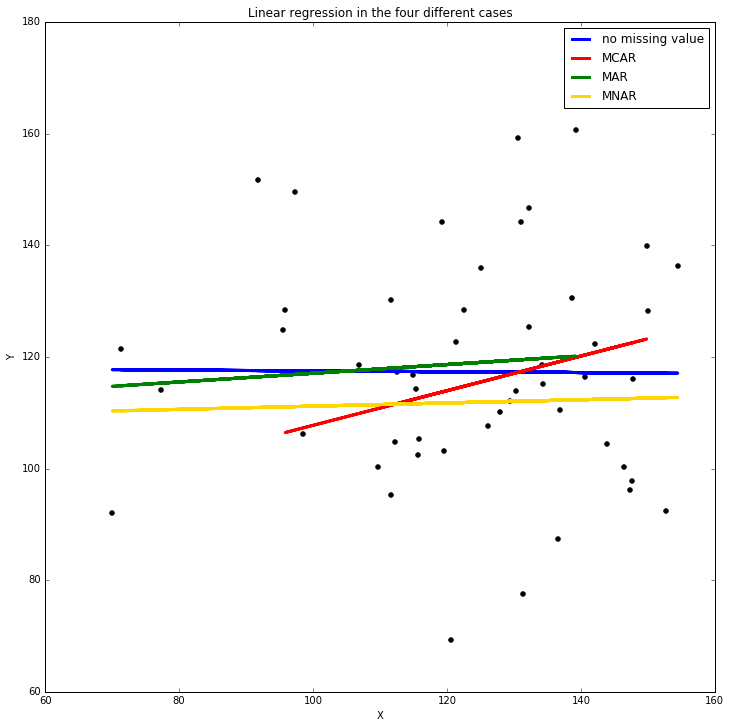

All four lines are different. The one with values that are MCAR has a negative slope, which means that we would think       there is a negative correlation between X and Y, when in fact it is not the case.       
Concerning the MAR and MNAR curves, they have a positive slope as the original line.       
But the intercept and slope values quite different.


In [2]:
### a. Preliminaries
mean = [125, 125]
cov = np.array([[625, 375], [375, 625]])


## STEP 1 : Generate 50 data points from the bivariate distribution
X, Y = list(), list()

np.random.seed(1)

for i in range(50): 
    X.append(np.random.multivariate_normal(mean, cov)[0])
    Y.append(np.random.multivariate_normal(mean, cov)[1])    

data = np.asarray([X,Y])
  
    

## STEP 2 : Regress Y on X with an intercept term. Compute the coefficient corresponding to X.

# reshape explanatory variable X
X = data[0].reshape(50,1)

# fit linear regression
lm = linear_model.LinearRegression(fit_intercept=True)
lm.fit(X, Y)

print('.....................................................\n \
      Linear regression with all observations \
      \n.....................................................')
print('The coefficient corresponding to X is ' + str(lm.fit(X, Y).coef_[0]))
print('The intercept is ' + str(lm.fit(X, Y).intercept_))




## STEP 3 : Same question when using MCAR model. 
alpha = 0.73
Y_missing = random.sample(Y, math.floor(50*alpha))

data_MCAR = np.empty((0,2))
for i in range(50):
    if data[1,i] not in Y_missing:
        data_MCAR = np.append(data_MCAR, data[:,i])

data_MCAR.resize(len(data_MCAR)//2, 2)


X_MCAR = data_MCAR[:,0] 
X_MCAR = X_MCAR.reshape(len(X_MCAR),1)
Y_MCAR = data_MCAR[:,1]       

lm_MCAR = linear_model.LinearRegression(fit_intercept=True)
lm_MCAR.fit(X_MCAR, Y_MCAR)

print('\n \n')
print('.............................................\n \
      Missing Completely At Random (MCAR) \
      \n.............................................')

print('The coefficient corresponding to X is ' + str(lm_MCAR.fit(X_MCAR, Y_MCAR).coef_[0]))
print('The intercept is ' + str(lm_MCAR.fit(X_MCAR, Y_MCAR).intercept_))
        


## STEP 4 : Same question when using MAR model. 
data_MAR = np.empty((0,2))

for i in range(50):
    if data[0,i] <= 140:
        data_MAR = np.append(data_MAR, data[:,i])  

data_MAR.resize(len(data_MAR)//2, 2)


X_MAR = data_MAR[:,0] 
X_MAR = X_MAR.reshape(len(X_MAR),1)
Y_MAR = data_MAR[:,1]       

lm_MAR = linear_model.LinearRegression(fit_intercept=True)
lm_MAR.fit(X_MAR, Y_MAR)

print('\n \n')
print('..................................\n \
      Missing At Random (MCAR) \
      \n..................................')

print('The coefficient corresponding to X is ' + str(lm_MAR.fit(X_MAR, Y_MAR).coef_[0]))
print('The intercept is ' + str(lm_MAR.fit(X_MAR, Y_MAR).intercept_))
     
    
## STEP 5 : Same question when using MNAR model. 
data_MNAR = np.empty((0,2))

for i in range(50):
    if data[1,i] <= 140:
        data_MNAR = np.append(data_MNAR, data[:,i])  

data_MNAR.resize(len(data_MNAR)//2, 2)


X_MNAR = data_MNAR[:,0] 
X_MNAR = X_MNAR.reshape(len(X_MNAR),1)
Y_MNAR = data_MNAR[:,1]       

lm_MNAR = linear_model.LinearRegression(fit_intercept=True)
lm_MNAR.fit(X_MNAR, Y_MNAR)

print('\n \n')
print('.........................................\n \
      Missing Not At Random (MNAR) \
      \n.........................................')

print('The coefficient corresponding to X is ' + str(lm_MNAR.fit(X_MNAR, Y_MNAR).coef_[0]))
print('The intercept is ' + str(lm_MNAR.fit(X_MNAR, Y_MNAR).intercept_) + '\n \n')


## STEP 6 : Plot the best fit line for all points X for each of the 4 conditions above
plt.figure(figsize = (12,12))

plt.scatter(X, Y,  color='black')

plt.plot(X, lm.predict(X), color='blue', label = 'no missing value', linewidth=3)
plt.plot(X_MCAR, lm_MCAR.predict(X_MCAR), color='red', label = 'MCAR', linewidth=3)
plt.plot(X_MAR, lm_MAR.predict(X_MAR), color='green', label = 'MAR', linewidth=3)
plt.plot(X_MNAR, lm_MNAR.predict(X_MNAR), color='gold', label = 'MNAR', linewidth=3)

plt.xticks()
plt.yticks()

plt.title('Linear regression in the four different cases')  
plt.xlabel('X')  
plt.ylabel('Y')  
plt.legend()
plt.show()


## STEP 7 : Comment on the best fit linesfor each of the regressions 
print('All four lines are different. The one with values that are MCAR has a negative slope, which means that we would think \
      there is a negative correlation between X and Y, when in fact it is not the case. \
      \nConcerning the MAR and MNAR curves, they have a positive slope as the original line. \
      \nBut the intercept and slope values quite different.')

In [4]:
### b. Repeat procedure 100 times

def returnBeta(T, missing):
    
    mean = [125, 125]
    cov = np.array([[625, 375], [375, 625]])
    
    beta = list()
    for nsim in range(T):
        X, Y = list(), list()

        for i in range(50): 
            X.append(np.random.multivariate_normal(mean, cov)[0])
            Y.append(np.random.multivariate_normal(mean, cov)[1])    

            data = np.asarray([X,Y])
            
            
            # STEP 2
        if missing == 'none':
            X = data[0].reshape(50,1)
            lm = linear_model.LinearRegression(fit_intercept=True)
            lm.fit(X, Y)
            beta.append(lm.fit(X, Y).coef_[0])
                
            # STEP 3
        if missing == 'MCAR':
            alpha = 0.73
            Y_missing = random.sample(Y, math.floor(50*alpha))

            data_MCAR = np.empty((0,2))
            for i in range(50):
                if data[1,i] not in Y_missing:
                    data_MCAR = np.append(data_MCAR, data[:,i])

            data_MCAR.resize(len(data_MCAR)//2, 2)


            X_MCAR = data_MCAR[:,0] 
            X_MCAR = X_MCAR.reshape(len(X_MCAR),1)
            Y_MCAR = data_MCAR[:,1]       

            lm_MCAR = linear_model.LinearRegression(fit_intercept=True)
            lm_MCAR.fit(X_MCAR, Y_MCAR)
                
            beta.append(lm_MCAR.fit(X_MCAR, Y_MCAR).coef_[0])
                
                
            # STEP 4
        if missing == 'MAR':
            data_MAR = np.empty((0,2))

            for i in range(50):
                if data[0,i] <= 140:
                    data_MAR = np.append(data_MAR, data[:,i])  

            data_MAR.resize(len(data_MAR)//2, 2)


            X_MAR = data_MAR[:,0] 
            X_MAR = X_MAR.reshape(len(X_MAR),1)
            Y_MAR = data_MAR[:,1]       

            lm_MAR = linear_model.LinearRegression(fit_intercept=True)
            lm_MAR.fit(X_MAR, Y_MAR)
            beta.append(lm_MAR.fit(X_MAR, Y_MAR).coef_[0])
                
                
            #  STEP 5
        if missing == 'MNAR':
            data_MNAR = np.empty((0,2))

            for i in range(50):
                if data[1,i] <= 140:
                    data_MNAR = np.append(data_MNAR, data[:,i])  

            data_MNAR.resize(len(data_MNAR)//2, 2)


            X_MNAR = data_MNAR[:,0] 
            X_MNAR = X_MNAR.reshape(len(X_MNAR),1)
            Y_MNAR = data_MNAR[:,1]       

            lm_MNAR = linear_model.LinearRegression(fit_intercept=True)
            lm_MNAR.fit(X_MNAR, Y_MNAR)

            beta.append(lm_MNAR.fit(X_MNAR, Y_MNAR).coef_[0])
                
        
    return np.mean(beta)


In [5]:
print('The slope coeficient in the original case is ' + str(returnBeta(100, 'none')) 
      + '\nin the MCAR case : ' + str(returnBeta(100, 'MCAR'))
      + '\nin the MAR case : ' + str(returnBeta(100, 'MAR')) 
      + '\nin the MNAR case : ' + str(returnBeta(100, 'MNAR')) )

The slope coeficient in the original case is -0.0109196194421
in the MCAR case : 0.0104717964973
in the MAR case : 0.0237431722326
in the MNAR case : 0.00350816137501


In [91]:
print('The slope coeficient in the original case is ' + str(returnBeta(1000, 'none')) 
      + '\nin the MCAR case : ' + str(returnBeta(1000, 'MCAR'))
      + '\nin the MAR case : ' + str(returnBeta(1000, 'MAR')) 
      + '\nin the MNAR case : ' + str(returnBeta(1000, 'MNAR')) )

The slope coeficient in the original case is 0.006
in the MCAR case : -0.009
in the MAR case : -0.011
in the MNAR case : 0.001
